In [1]:
import open3d as o3d
import cv2
import matplotlib.pyplot as plt
import numpy as np

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
def BGR_to_RGB(img):
    image_np = np.asarray(img)
    #交換 B 和 R 
    if len(image_np.shape) == 3 and image_np.shape[2] == 3:
        image_np = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)
    return image_np
def to_Gray(img):
    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return image

In [3]:
rgb_path = 'room.png'
depth_path = 'room_depth.png'
room = cv2.imread(rgb_path)
room_depth = cv2.imread(depth_path)

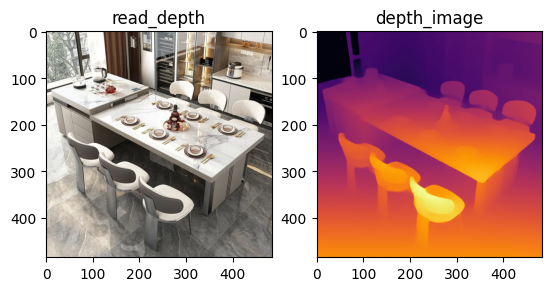

In [4]:
plt.subplot(1,2,1)
plt.title('read_depth')
plt.imshow(BGR_to_RGB(room))
plt.subplot(1,2,2)
plt.title('depth_image')
plt.imshow(BGR_to_RGB(room_depth))
plt.show()

In [5]:
# #Gray scale (load, then transfer to Open3dImageFormat)
# color = o3d.geometry.Image((room))
# depth = o3d.geometry.Image((room_depth))
# rgbd = o3d.geometry.RGBDImage.create_from_color_and_depth(color, depth, depth_scale=1000.0, depth_trunc=3.0, convert_rgb_to_intensity=True)

In [6]:
# pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd, o3d.camera.PinholeCameraIntrinsic(o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
# #Flip, otherwise upside down
# pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
# o3d.visualization.draw_geometries([pcd])

In [7]:
def create_xyzrgb(rgb_img, depth):
    width, height = rgb_img.shape[0], rgb_img.shape[1]
    x_list = np.arange(0, width)
    y_list = np.arange(0, height)
    xyzrgb=[]
    for x in x_list:
        for y in y_list:
            xyzrgb.append([x, y, depth[x,y], rgb_img[x,y,0]/255, rgb_img[x,y,1]/255, rgb_img[x,y,2]/255 ])
    return np.asarray(xyzrgb)

In [8]:
xyzrgb = create_xyzrgb(BGR_to_RGB(room), to_Gray(room_depth))
xyzrgb_filename = 'room.xyzrgb'
np.savetxt(xyzrgb_filename, xyzrgb)

In [9]:
pcd = o3d.io.read_point_cloud(xyzrgb_filename)
#Rotate 90 degree by z-axix
pcd.transform([[0, 1, 0, 0], [-1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd])